We used Google drive to save our raw and cleaned dataset.This step is optional.If you are not using Google drive, please use the path with "./data" directory

In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Import Library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression tasks
from sklearn.metrics import accuracy_score  # or appropriate metrics for your problem
import gc
import matplotlib.pyplot as plt

Load encoded dataset

In [ ]:
df = pd.read_csv('./drive/MyDrive/train_encoded.csv')
# df = pd.read_csv('./data/train_encoded.csv')

Split the dataset into training and testing.

In [ ]:
target_column = "HasDetections"
data_id = 'MachineIdentifier'
X = df.drop(target_column, axis=1).drop(data_id, axis=1)
y = df[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Delete the loaded whole dataset to save memory.

In [ ]:
del df
gc.collect()

0

Train random forest model.

In [ ]:
# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)  # Use RandomForestRegressor for regression

# Train the model
model.fit(X_train, y_train)

KeyboardInterrupt: ignored

Make prediction on testing dataset and find accuracy.

In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.6485097797455585


Retrieve feature importance

In [ ]:
importances = model.feature_importances_

Match Feature Importances with Column Names

In [ ]:
feature_names = X.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=["importance"]).sort_values("importance", ascending=False)

In [ ]:
feature_importances.sort_values(by='importance', ascending=False)

,importance
AvSigVersion,0.056720
index,0.055433
SmartScreen,0.054981
CityIdentifier,0.050401
Census_SystemVolumeTotalCapacity,0.049790
...,...
Census_IsPenCapable,0.001316
Census_IsAlwaysOnAlwaysConnectedCapable,0.000923
OsVer,0.000481
Platform,0.000436


Visualize Feature Importances

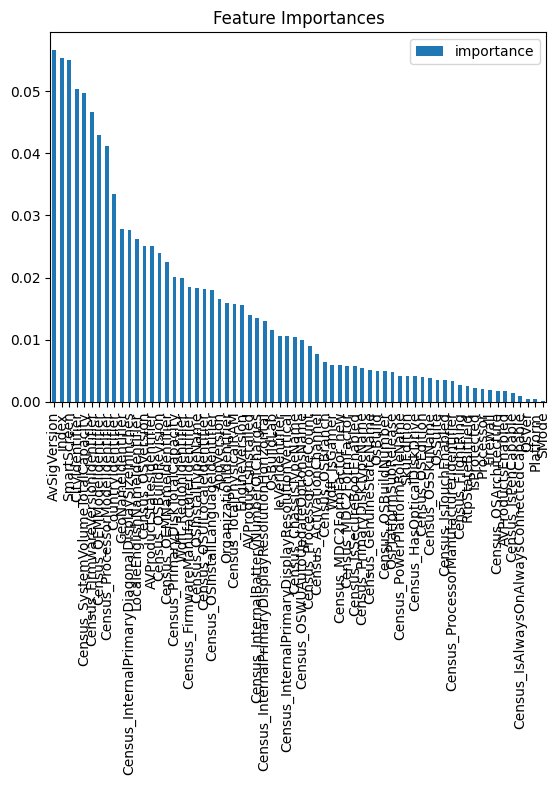

In [ ]:
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()